Build and train a Convolutional Neural Network (CNN) using TensorFlow 2 to classify handwritten digits from the MNIST dataset.

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.datasets import mnist

In [3]:
#Load MNIST dataset
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [4]:
#Normalize and reshape the data
X_train=X_train/255.0
X_test=X_test/255.0
X_train=X_train[...,tf.newaxis]
X_test=X_test[...,tf.newaxis]

In [5]:
#Define CNN model
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(100,activation='relu'),
    Dense(10,activation='softmax')
])

In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
model.fit(X_train,y_train,epochs=5,validation_split=0.1,verbose=1)

Epoch 1/5
1688/1688 [==============================] - 39s 22ms/step - loss: 0.1445 - accuracy: 0.9558 - val_loss: 0.0513 - val_accuracy: 0.9852
Epoch 2/5
1688/1688 [==============================] - 48s 29ms/step - loss: 0.0452 - accuracy: 0.9860 - val_loss: 0.0400 - val_accuracy: 0.9897
Epoch 3/5
1688/1688 [==============================] - 42s 25ms/step - loss: 0.0299 - accuracy: 0.9908 - val_loss: 0.0555 - val_accuracy: 0.9828
Epoch 4/5
1688/1688 [==============================] - 45s 27ms/step - loss: 0.0234 - accuracy: 0.9923 - val_loss: 0.0403 - val_accuracy: 0.9897
Epoch 5/5
1688/1688 [==============================] - 42s 25ms/step - loss: 0.0153 - accuracy: 0.9947 - val_loss: 0.0361 - val_accuracy: 0.9910


In [8]:
loss,accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f"Test loss: {loss:.3f}, Test accuracy: {accuracy:.3f}")

Test loss: 0.033, Test accuracy: 0.991


1/1 [==============================] - 0s 32ms/step


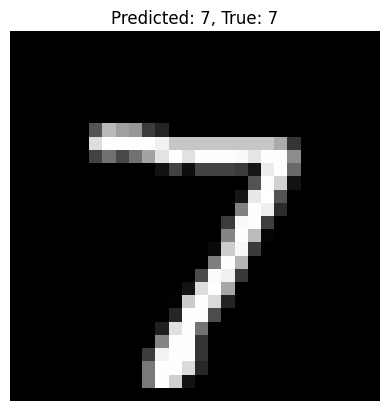

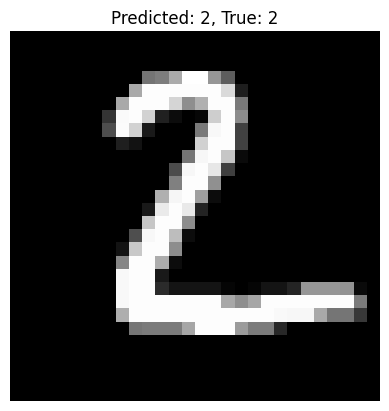

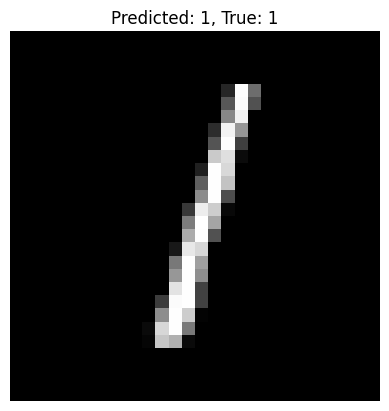

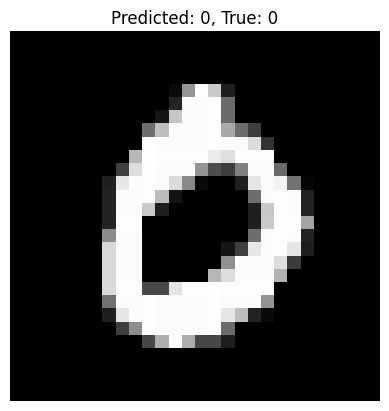

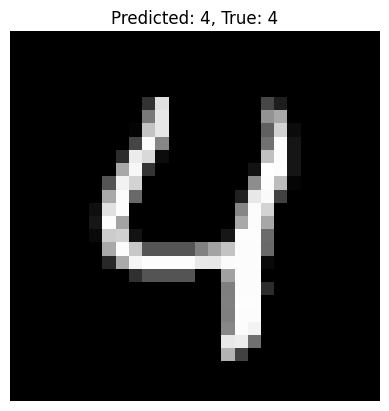

In [16]:
import numpy as np
preds = model.predict(X_test[:5])
for i, pred in enumerate(preds):
    plt.imshow(X_test[i].squeeze(), cmap='gray')
    plt.title(f"Predicted: {tf.argmax(pred).numpy()}, True: {y_test[i]}")
    plt.axis('off')
    plt.show()